In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd '/content/drive/MyDrive/ada lovelace/' #drive path

/content/drive/MyDrive/ada lovelace


# Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score
%matplotlib inline
import matplotlib.pyplot as plt
import re
import seaborn as sns

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')

from sklearn.svm import SVC
from sklearn.model_selection import KFold



# Explore the data

Load and preview data

In [ ]:
train = pd.read_csv('')
test = pd.read_csv('')
train

**Cleaning**

In [ ]:
train['id'].unique().shape

(8610,)

In [ ]:
#look for null values
print('Null values in train data\n',train.isna().sum(), '\n')
print('Null values in test data\n',test.isna().sum(), '\n')
print(train.info(), '\n')
print(test.info())

In [ ]:
train['depression'].unique()

array([0, 1])

In [ ]:
y_train = train.loc[:,'depression']
X_train = train.loc[:, train.columns != 'depression']

X_test = test

In [ ]:
X_train.drop('id',inplace=True, axis=1)
test_id = X_test['id']
X_test.drop('id',inplace=True, axis=1)

KNN Imputation 

In [ ]:
def knnimputer(data):
  from sklearn.impute import KNNImputer

  knnimp = KNNImputer(n_neighbors=5)
  data = pd.DataFrame(knnimp.fit_transform(data), columns = data.columns)
  return data

X_train_imp = knnimputer(X_train)
X_test_imp = knnimputer(X_test)
print('Train\n', X_train_imp.isnull().sum())
print('\nTest\n', X_test_imp.isnull().sum())

Train
 city                      0
gender                    0
age                       0
job                       0
health_worker_self        0
health_worker_family      0
family_status             0
income_group              0
current_physical          0
past_physical             0
current_mental            0
past_mental               0
exercise                  0
healthy_diet              0
healthy_sleep             0
activity                  0
interaction_offline       0
interaction_online        0
preventive_behaviors      0
optimism                  0
deterioration_economy     0
deterioration_interact    0
frustration               0
covid_anxiety             0
covid_sleepless           0
difficulty_living         0
difficulty_work           0
dtype: int64

Test
 city                      0
gender                    0
age                       0
job                       0
health_worker_self        0
health_worker_family      0
family_status             0
income_group         

Pearson Correlation

In [ ]:
colormap = plt.cm.RdBu
plt.figure(figsize=(18,16))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train_imp.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Split into train and validation

In [ ]:
from sklearn.model_selection import train_test_split

X_train_new, X_val, y_train_new, y_val = train_test_split(X_train_imp, y_train, test_size = 0.1)
print(X_train_new.shape, y_train_new.shape, X_val.shape)


(7749, 27) (7749,) (861, 27)


# Training and Validation

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

seed = 100

# rf = RandomForestClassifier(
#                       min_samples_leaf=50,
#                       n_estimators=150,
#                       bootstrap=True,
#                       oob_score=True,
#                       n_jobs=-1,
#                       random_state=seed,
#                       max_features='auto')

rf = RandomForestClassifier(
                      min_samples_leaf=20,
                      n_estimators=500,
                      bootstrap=True,
                      oob_score=True,
                      n_jobs=-1,
                      random_state=seed,
                      max_features='auto')


rf.fit(X_train_new,y_train_new)

y_pred_rf = rf.predict(X_val)
y_predproba_rf = rf.predict_proba(X_val)[:, 1]

Feature selection

In [ ]:
sel = SelectFromModel(rf)
sel.fit(X_train_new,y_train_new)
sel.get_support()

selected_feat= X_train_new.columns[(sel.get_support())]
len(selected_feat)
print(selected_feat)

X_important_train = sel.transform(X_train_new)
X_important_val = sel.transform(X_val)
X_important_test = sel.transform(X_test_imp)

In [ ]:
X_important_test = pd.DataFrame(X_important_test, columns = selected_feat)
X_important_train = pd.DataFrame(X_important_train, columns = selected_feat)
X_important_val = pd.DataFrame(X_important_val, columns = selected_feat)

random search with cross validation

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV

# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]

# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}

# print(random_grid)

no need to run this twice.

In [ ]:
# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = RandomForestClassifier(random_state = seed)
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
#                               n_iter = 100, scoring='neg_mean_absolute_error', 
#                               cv = 3, verbose=1, random_state=seed, n_jobs=-1,
#                               return_train_score=True)

# # Fit the random search model
# rf_random.fit(X_train_new,y_train_new)



In [ ]:
#rf_random.best_params_

*RESULTS*
<br>
{'bootstrap': True, <br>
 'max_depth': 40,<br>
 'min_samples_leaf': 1,<br>
 'min_samples_split': 10,<br>
 'n_estimators': 200}


Feature Importances

In [ ]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train_imp.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)                                  
print('Random Forest')
plt.bar([x for x in range(len(rf.feature_importances_))], rf.feature_importances_)
plt.show()
feature_importances


RF Validation

In [ ]:
print('RF score train: ', rf.score(X_train_imp,y_train))
print('RF score val: ', rf.score(X_val,y_val))

fpr, tpr, _ = roc_curve(y_val, y_predproba_rf)

print(f"The accuracy of the model is {round(accuracy_score(y_val,y_pred_rf),3)*100} %")
print(f"The AUC score of the model is {round(roc_auc_score(y_val,y_predproba_rf),3)*100} %")
print(f"The f1-score of the model is {round(f1_score(y_val,y_pred_rf),3)*100} %")

In [ ]:
def plot_confusion_matrix(normalize):
  classes = ['Yes','No']
  tick_marks = [0.5,1.5]
  cn = confusion_matrix(y_val, y_pred_rf,normalize=normalize)
  sns.heatmap(cn,cmap='plasma',annot=True)
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

print('Confusion Matrix without Normalization')
plot_confusion_matrix(normalize=None)

print('Confusion Matrix with Normalized Values')
plot_confusion_matrix(normalize='true')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred_rf))



In [ ]:
y_pred_test = rf.predict_proba(X_test_imp)[:, 1]
a = pd.DataFrame(test_id)
b = pd.DataFrame(np.array(y_pred_test))
b.columns=['depression']

df = pd.concat([a,b], axis=1)
df.to_csv('/Output/7_babayaga_RF_full.csv', index = False)
df

Decision Tree

In [ ]:
#  from sklearn.tree import DecisionTreeClassifier

#  dt = DecisionTreeClassifier(random_state=0)

#  dt.fit(X_train_new,y_train_new)

# y_pred_dt = dt.predict(X_val)
# y_predproba_dt = dt.predict_proba(X_val)[:, 1]

Validation

In [ ]:
# print('DT score train: ', dt.score(X_train_new,y_train_new))
# print('DT score val: ', dt.score(X_val,y_val))

# fpr, tpr, _ = roc_curve(y_val, y_predproba_dt)

# print(f"The accuracy of the model is {round(accuracy_score(y_val,y_pred_dt),3)*100} %")
# print(f"The AUC score of the model is {round(roc_auc_score(y_val,y_predproba_dt),3)*100} %")
# print(f"The f1-score of the model is {round(f1_score(y_val,y_pred_dt),3)*100} %")

KNN

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier

# k_range = range(1,26)
# scores = {}
# scores_list = []

# for k in k_range:
#   knn = KNeighborsClassifier(n_neighbors = k)
#   knn.fit(X_train_new,y_train_new)
#   y_pred_knn = knn.predict(X_val)
#   y_predproba_knn = knn.predict_proba(X_val)[:, 1]
#   scores[k] = accuracy_score(y_val,y_pred_knn)
#   scores_list.append(accuracy_score(y_val,y_pred_knn))

In [ ]:
# %matplotlib inline
# import matplotlib.pyplot as plt

# plt.plot(k_range, scores_list)
# plt.xlabel('Value of k')
# plt.ylabel('Testing accuracy')

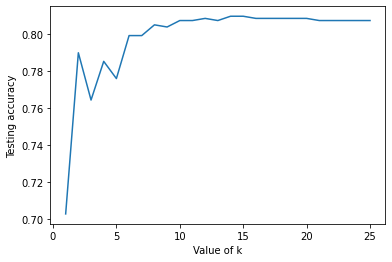
<br>
so we choose k = 14

In [ ]:
# knn = KNeighborsClassifier(n_neighbors = 14)
# knn.fit(X_train_new,y_train_new)
# y_pred_knn = knn.predict(X_val)
# y_predproba_knn = knn.predict_proba(X_val)[:, 1]

validation

In [ ]:
# print('KNN score train: ', knn.score(X_train_new,y_train_new))
# print('KNN score val: ', knn.score(X_val,y_val))

# fpr, tpr, _ = roc_curve(y_val, y_predproba_knn)

# print(f"The accuracy of the model is {round(accuracy_score(y_val,y_pred_knn),3)*100} %")
# print(f"The AUC score of the model is {round(roc_auc_score(y_val,y_predproba_knn),3)*100} %")
# print(f"The f1-score of the model is {round(f1_score(y_val,y_pred_knn),3)*100} %")

KNN prediction

In [ ]:
# y_pred_test = knn.predict_proba(X_test_imp)[:, 1]
# a = pd.DataFrame(test_id)
# b = pd.DataFrame(np.array(y_pred_test))
# b.columns=['depression']

# df = pd.concat([a,b], axis=1)
# df.to_csv('/content/drive/MyDrive/Projetcs/Ada Lovelace Datathon 2021/Output/7_babayaga_KNN_14.csv', index = False)
# df

XGBoost

Grid Search

In [ ]:
# from sklearn.model_selection import GridSearchCV 

# param_test1 = {
#  'max_depth':range(3,10,2),
#  'min_child_weight':range(1,6,2)
# }
# gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
#  min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
#  objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
#  param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=3)
# gsearch1.fit(X_train_new,y_train_new)
# gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

# param_test2 = {
#  'max_depth':[4,5,6],
#  'min_child_weight':[4,5,6]
# }
# gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
#  min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
#  objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
#  param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
# gsearch2.fit(X_train_new,y_train_new)
# gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

# param_test3 = {
#  'gamma':[i/10.0 for i in range(0,5)]
# }
# gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
#  min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
#  objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
#  param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
# gsearch3.fit(X_train_new,y_train_new)
# gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

# param_test4 = {
#  'subsample':[i/10.0 for i in range(6,10)],
#  'colsample_bytree':[i/10.0 for i in range(6,10)]
# }
# gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
#  min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
#  objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
#  param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
# gsearch4.fit(X_train_new,y_train_new)
# gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

# param_test6 = {
#  'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
# }
# gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
#  min_child_weight=6, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
#  objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
#  param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
# gsearch6.fit(X_train_new,y_train_new)
# gsearch6.cv_results_, gsearch6.best_params_, gsearch6.best_score_

In [ ]:
# xgb4 = XGBClassifier(
#  learning_rate =0.01,
#  n_estimators=5000,
#  max_depth=4,
#  min_child_weight=6,
#  gamma=0.2,
#  subsample=0.9,
#  colsample_bytree=0.6,
#  reg_alpha=0.005,
#  objective= 'binary:logistic',
#  nthread=4,
#  scale_pos_weight=1,
#  seed=27)

# print(cross_val_score(xgb3, X_train_new,y_train_new))

# xgb4.fit(X_train_new,y_train_new)
# y_pred_xgb = xgb4.predict(X_val)
# y_predproba_xgb= xgb4.predict_proba(X_val)[:, 1]

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

xgb = XGBClassifier(eta = 0.01, objective = 'binary:logistic')

print(cross_val_score(xgb, X_train,y_train))
xgb.fit(X_train_imp,y_train)
# y_pred_xgb = xgb.predict(X_val)
# y_predproba_xgb= xgb.predict_proba(X_val)[:, 1]

Feature Importances

In [ ]:
# feature_importances_x = pd.DataFrame(xgb.feature_importances_,
#                                    index = X_train_imp.columns,
#                                     columns=['importance']).sort_values('importance',
#                                                                         ascending=False)                                  
# print('XGBoost')
# plt.bar([x for x in range(len(xgb.feature_importances_))], xgb.feature_importances_)
# plt.show()
# feature_importances_x 

validation

In [ ]:
# print('XGBoost score train: ', xgb.score(X_train_new,y_train_new))
# print('XGBoost score val: ', xgb.score(X_val,y_val))

# fpr, tpr, _ = roc_curve(y_val, y_predproba_xgb)

# print(f"The accuracy of the model is {round(accuracy_score(y_val,y_pred_xgb),3)*100} %")
# print(f"The AUC score of the model is {round(roc_auc_score(y_val,y_predproba_xgb),3)*100} %")
# print(f"The f1-score of the model is {round(f1_score(y_val,y_pred_xgb),3)*100} %")

Prediction

In [ ]:
y_pred_test = xgb.predict_proba(X_test_imp)[:, 1]
a = pd.DataFrame(test_id)
b = pd.DataFrame(np.array(y_pred_test))
b.columns=['depression']

df = pd.concat([a,b], axis=1)
df.to_csv('/content/drive/MyDrive/Output/7_babayaga_xgb_full.csv', index = False)
df

One Hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)

print('Original number of features: \n', X_train_imp.shape[1], "\n")
ohe_train = (ohe.fit_transform(X_train_imp))
# ohe_val = (ohe.transform(X_val))
print('Features after OHE: \n', ohe_train.shape[1])

rf.fit(ohe_train,y_train)
# ohe_rf_score = rf.score(ohe_val,y_val)
# print('Random Forest score with one-hot encoding:', ohe_rf_score)

# y_pred_rf = rf.predict(ohe_val)
# y_predproba_rf = rf.predict_proba(ohe_val)[:, 1]

# print(f"The accuracy of the model is {round(accuracy_score(y_val,y_pred_rf),3)*100} %")
# print(f"The AUC score of the model is {round(roc_auc_score(y_val,y_predproba_rf),3)*100} %")
# print(f"The f1-score of the model is {round(f1_score(y_val,y_pred_rf),3)*100} %")

Target Encoding

In [ ]:
!pip install --upgrade category_encoders
!pip install xgboost
!pip install featuretools

In [ ]:
# from category_encoders import TargetEncoder

# targ_enc = TargetEncoder(cols=X_train_new.columns, smoothing=8, min_samples_leaf=5).fit(X_train_new, y_train_new)

# X_train_te = targ_enc.transform(X_train_new.reset_index(drop=True))
# X_val_te = targ_enc.transform(X_val.reset_index(drop=True))

# X_train_te.head()

# rf.fit(X_train_te,y_train_new)
# te_rf_score = rf.score(X_val_te,y_val)
# print('Random Forest score with one-hot encoding:', te_rf_score)

# y_pred_rf = rf.predict(X_val_te)
# y_predproba_rf = rf.predict_proba(X_val_te)[:, 1]

# print(f"The accuracy of the model is {round(accuracy_score(y_val,y_pred_rf),3)*100} %")
# print(f"The AUC score of the model is {round(roc_auc_score(y_val,y_predproba_rf),3)*100} %")
# print(f"The f1-score of the model is {round(f1_score(y_val,y_pred_rf),3)*100} %")

Weight of Evidence

In [ ]:
from category_encoders import WOEEncoder

woe_enc = WOEEncoder(cols=X_train_imp.columns, random_state=17).fit(X_train_imp, y_train)

X_train_woe = woe_enc.transform(X_train_imp.reset_index(drop=True))
# X_val_woe = woe_enc.transform(X_val.reset_index(drop=True))

X_train_woe.head()

model.fit(X_train_woe,y_train)
# woe_rf_score = rf.score(X_val_woe,y_val)
# print('Random Forest score with one-hot encoding:', woe_rf_score)

# y_pred_rf = stacking_model.predict(X_val_woe)
# y_predproba_rf = stacking_model.predict_proba(X_val_woe)[:, 1]

# print(f"The accuracy of the model is {round(accuracy_score(y_val,y_pred_rf),3)*100} %")
# print(f"The AUC score of the model is {round(roc_auc_score(y_val,y_predproba_rf),3)*100} %")
# print(f"The f1-score of the model is {round(f1_score(y_val,y_pred_rf),3)*100} %")

Hashing

In [ ]:
# from category_encoders import HashingEncoder

# n_components_list = [100, 500, 1000, 5000, 10000]
# n_components_list_str = [str(i) for i in n_components_list]

# hashing_enc = HashingEncoder(cols=X_train_new.columns, n_components=10000).fit(X_train_new, y_train_new)

# X_train_hashing = hashing_enc.transform(X_train_new.reset_index(drop=True))
# X_val_hashing = hashing_enc.transform(X_val.reset_index(drop=True))

# X_train_hashing.head()
    
# rf.fit(X_train_hashing,y_train_new)
# hashing_rf_score = rf.score(X_val_hashing,y_val)
# print('Random Forest score with one-hot encoding:', hashing_rf_score)

Leave One Out

In [ ]:
# from category_encoders import LeaveOneOutEncoder

# loo_enc = LeaveOneOutEncoder(cols=X_train_new.columns).fit(X_train_new, y_train_new)

# X_train_loo = loo_enc.transform(X_train_new.reset_index(drop=True))
# X_val_loo = loo_enc.transform(X_val.reset_index(drop=True))

# X_train_loo.head()

# rf.fit(X_train_loo,y_train_new)
# loo_rf_score = rf.score(X_val_loo,y_val)
# print('Random Forest score with leave one out:', loo_rf_score)

In [ ]:
#X_test_ohe = ohe.transform(X_test_imp)
#X_test_te = targ_enc.transform(X_test_imp.reset_index(drop=True))
X_test_woe = woe_enc.transform(X_test_imp.reset_index(drop=True))

y_pred_test = model.predict_proba(X_test_woe)[:, 1]
a = pd.DataFrame(test_id)
b = pd.DataFrame(np.array(y_pred_test))
b.columns=['depression']

df = pd.concat([a,b], axis=1)
df.to_csv('/content/drive/MyDrive/7_babayaga_xgbrf_woe_full.csv', index = False)
df

### Ensemble 

In [ ]:
#XGBoost Random Forest

# evaluate xgboost random forest algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBRFClassifier

# define the model
model = XGBRFClassifier(n_estimators=500, subsample=0.9, colsample_bynode=0.2)
# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X_train_imp, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Max Voting

In [ ]:
# from sklearn.ensemble import VotingClassifier
# model1 = rf
# model2 = xgb
# model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='soft')
# model.fit(X_train_new,y_train_new)
# model.score(X_val,y_val)

Stacking

In [ ]:
# models_dict = {'random_forest': rf,
#                'svm': SVC(),
#                'xgboost' : xgb}

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from collections import defaultdict
# def evaluate_model(model, X, y):
#     cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
#     scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, verbose=1, n_jobs=3, error_score='raise')
#     return scores
# model_scores = defaultdict()
# for name, model in models_dict.items():
#     print('Evaluating {}'.format(name))
#     scores = evaluate_model(model, X_train_new, y_train_new)
#     model_scores[name] = scores

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier

base_models = [('random_forest', rf),
               ('svm', SVC()),
               ('knn', KNeighborsClassifier(n_neighbors=14))]
meta_model = xgb
stacking_model = StackingClassifier(estimators=base_models, 
                                    final_estimator=meta_model, 
                                    passthrough=True, 
                                    cv=5,
                                    verbose=2)

In [ ]:
stacking_scores = evaluate_model(stacking_model, X_train_imp, y_train)
model_scores['stacking'] = stacking_scores

In [ ]:
model_scores